importing essential libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [4]:
# Loadin g  the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
# Spliting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
#  defining the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# Fiting the dataset to Logistic Regression Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
# Make predictions
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [10]:
# creating Confusion matrix for metrics
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

In [11]:
# Computing the metrics
TPR = TP / (TP + FN)  # Sensitivity or Recall
FPR = FP / (FP + TN)  # Fall-out
TNR = TN / (TN + FP)  # Specificity
FNR = FN / (FN + TP)  # Miss rate
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = TPR

In [12]:
# Printing metrics
print("Confusion Matrix:\n", cm)
print(f"TPR (Sensitivity/Recall): {TPR:.2f}")
print(f"FPR: {FPR:.2f}")
print(f"TNR (Specificity): {TNR:.2f}")
print(f"FNR: {FNR:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

Confusion Matrix:
 [[ 61   2]
 [  2 106]]
TPR (Sensitivity/Recall): 0.98
FPR: 0.03
TNR (Specificity): 0.97
FNR: 0.02
Precision: 0.98
Recall: 0.98
Sensitivity: 0.98


In [13]:
# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

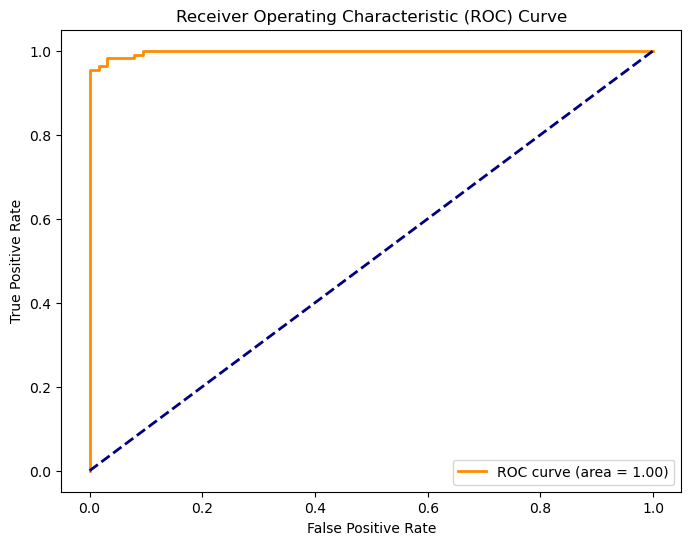

In [14]:
# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()